In [1]:
import sys
print(sys.executable)

C:\Users\GS\anaconda3\python.exe


In [2]:
!{sys.executable} -m pip install opencv-python

In [3]:
!pip show opencv-python

Name: opencv-python
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: C:\Users\GS\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: numpy
Required-by: 


In [4]:
!conda install -y -c conda-forge opencv

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [33]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [6]:
# Path to dataset and image size
data_dir = r'D:\DataScience_and_MachineLearning\internship\Skillcraft_Technologies\task_4\leapGestRecog'
image_size = (64, 64)

X = []
y = []

# Traverse through outer folders (00, 01, ..., 09)
for person_folder in os.listdir(data_dir):
    person_path = os.path.join(data_dir, person_folder)
    if not os.path.isdir(person_path):
        continue

    # Traverse through gesture folders (01_palm, 02_l, ...)
    for gesture_folder in os.listdir(person_path):
        gesture_path = os.path.join(person_path, gesture_folder)
        if not os.path.isdir(gesture_path):
            continue

        for file in os.listdir(gesture_path):
            if file.endswith('.png'):
                img_path = os.path.join(gesture_path, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    X.append(img)
                    # Extract label from gesture folder: '01_palm' → 'palm'
                    label = gesture_folder.split('_', 1)[1]
                    y.append(label)

# Convert X and y to numpy arrays
X = np.array(X).reshape(-1, image_size[0], image_size[1], 1) / 255.0

In [7]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [9]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_cat.shape[1], activation='softmax')  # 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\GS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 164ms/step - accuracy: 0.6469 - loss: 1.0608 - val_accuracy: 0.9962 - val_loss: 0.0185
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 162ms/step - accuracy: 0.9807 - loss: 0.0652 - val_accuracy: 0.9983 - val_loss: 0.0078
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 157ms/step - accuracy: 0.9872 - loss: 0.0400 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - accuracy: 0.9932 - loss: 0.0242 - val_accuracy: 0.9998 - val_loss: 0.0019
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - accuracy: 0.9921 - loss: 0.0223 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 171ms/step - accuracy: 0.9952 - loss: 0.0139 - val_accuracy: 1.0000 - val_loss: 4.1661e-04
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 153ms/step - accuracy: 0.9970 - loss: 0.0089 - val_accuracy: 0.9995 - val_loss: 8.6243e-04
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 151ms/step - accuracy: 0.9961 -

In [11]:
# Evaluate on test set
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9995 - loss: 5.7777e-04
Test Accuracy: 99.92%


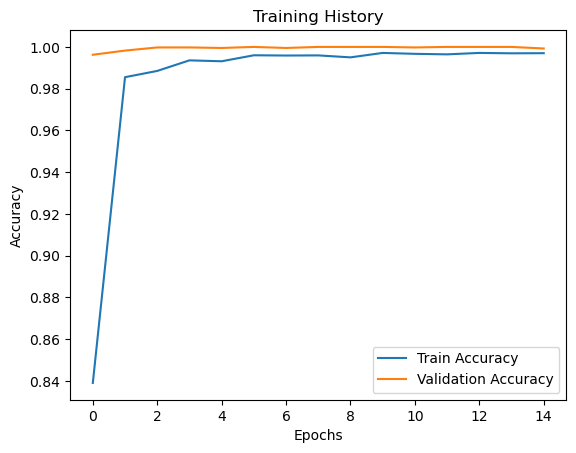

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()

In [27]:
def predict_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, image_size).reshape(1, 64, 64, 1) / 255.0
    pred = model.predict(img)
    return le.inverse_transform([np.argmax(pred)])[0]

In [31]:
print(predict_image("D:\\DataScience_and_MachineLearning\\internship\\Skillcraft_Technologies\\task_4\\leapGestRecog\\05\\06_index\\frame_05_06_0027.png"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
index


In [35]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


In [37]:
print(classification_report(y_true_labels, y_pred_labels, target_names=le.classes_))

              precision    recall  f1-score   support

           c       1.00      1.00      1.00       410
        down       1.00      1.00      1.00       366
        fist       1.00      1.00      1.00       404
  fist_moved       1.00      1.00      1.00       418
       index       1.00      1.00      1.00       392
           l       1.00      1.00      1.00       404
          ok       1.00      1.00      1.00       403
        palm       1.00      1.00      1.00       417
  palm_moved       1.00      1.00      1.00       409
       thumb       1.00      1.00      1.00       377

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



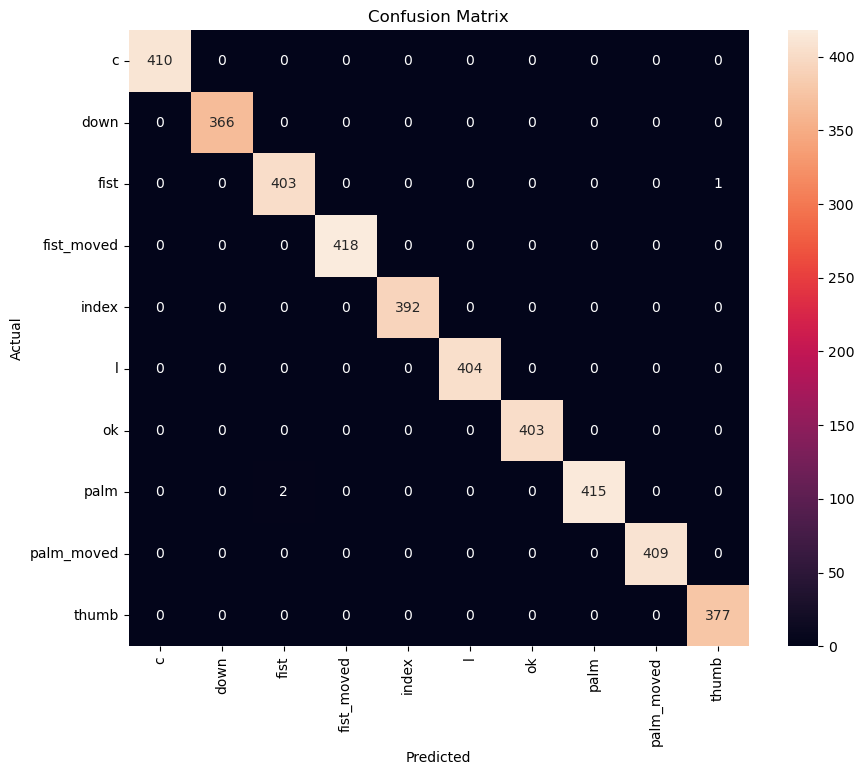

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()